In [4]:
import pandas as pd
import seaborn as sns

### Initial formatting and parsing

In [5]:
df = pd.read_excel("ACDC_Component_Cracks_2022.03.03-04(16).xlsx")

In [36]:
df.head()

,signalId,signalName,date,physicalSignalValue
0,132706,FA_Hoehenwert_HL_00,20220303,-40.0
1,132706,FA_Hoehenwert_HL_00,20220303,-50.0
2,132706,FA_Hoehenwert_HL_00,20220303,-60.0
3,132706,FA_Hoehenwert_HL_00,20220303,-30.0
4,132706,FA_Hoehenwert_HL_00,20220303,-10.0


In [7]:
df.signalName.unique()

array(['FA_Hoehenwert_HL_00', 'FA_BodyAcceleration_HL', 'ESP_v_Signal',
       'FA_BodyAcceleration_VL', 'FA_BodyAcceleration_VR',
       'FA_Hoehenwert_VL_00', 'FA_BodyAcceleration_HR',
       'FA_Hoehenwert_VR_00', 'FA_Hoehenwert_HR_00'], dtype=object)

In [24]:
dfESP = df[df.signalName == "ESP_v_Signal"]
dfFA = df[df.signalName != "ESP_v_Signal"]

array(['FA_Hoehenwert_HL_00', 'FA_BodyAcceleration_HL',
       'FA_BodyAcceleration_VL', 'FA_BodyAcceleration_VR',
       'FA_Hoehenwert_VL_00', 'FA_BodyAcceleration_HR',
       'FA_Hoehenwert_VR_00', 'FA_Hoehenwert_HR_00'], dtype=object)

In [26]:
dfsplit = dfFA.signalName.apply(lambda x:x.split("_"))
dfFA = dfFA.assign(
    signal = dfsplit.apply(lambda x: x[1]),
    position = dfsplit.apply(lambda x: x[2]),
).drop(columns=['signalId', 'date', 'signalName'])
dfsplit

0       [FA, Hoehenwert, HL, 00]
1       [FA, Hoehenwert, HL, 00]
2       [FA, Hoehenwert, HL, 00]
3       [FA, Hoehenwert, HL, 00]
4       [FA, Hoehenwert, HL, 00]
                  ...           
2022    [FA, Hoehenwert, HR, 00]
2023    [FA, Hoehenwert, HR, 00]
2024    [FA, Hoehenwert, HR, 00]
2025    [FA, Hoehenwert, HR, 00]
2026    [FA, Hoehenwert, HR, 00]
Name: signalName, Length: 1156, dtype: object

In [28]:
dfH = dfFA[dfFA.signal == "Hoehenwert"]

,physicalSignalValue,signal,position
28,2.300000e+16,BodyAcceleration,HL
29,-5.100000e+14,BodyAcceleration,HL
30,2.700000e+15,BodyAcceleration,HL
31,-3.300000e+15,BodyAcceleration,HL
32,1.900000e+16,BodyAcceleration,HL
...,...,...,...
1965,-2.090000e+02,BodyAcceleration,HR
1966,2.330000e+15,BodyAcceleration,HR
1967,2.290000e+16,BodyAcceleration,HR
1968,-3.270000e+16,BodyAcceleration,HR


### Checking on the distribution of values for the hight

position
HL    AxesSubplot(0.125,0.125;0.775x0.755)
HR    AxesSubplot(0.125,0.125;0.775x0.755)
VL    AxesSubplot(0.125,0.125;0.775x0.755)
VR    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

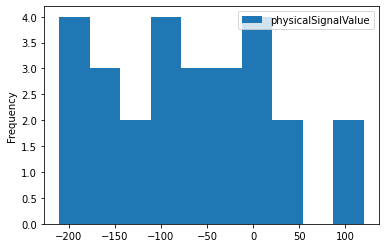

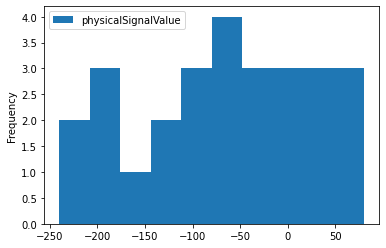

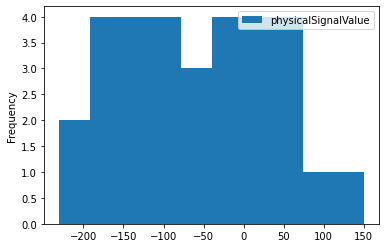

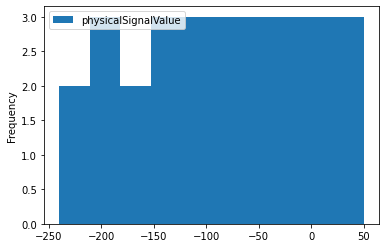

In [11]:
dfH.groupby("position").plot(kind="hist")

In [12]:
dfH.groupby("position").count()

,physicalSignalValue,signal
position,,
HL,27,28
HR,27,28
VL,31,32
VR,28,29


In [13]:
# in order to calculate the covariance matrix, we assume that the signal values on the four positions are mesured at the same time.
dfH = dfH.assign(count = dfH.groupby("position").cumcount())
sample_matrix = dfH.pivot(index='count', columns='position', values='physicalSignalValue').iloc[:27].fillna(axis=0, method='bfill')

In [14]:
sample_matrix

position,HL,HR,VL,VR
count,,,,
0,-40.0,-80.0,40.0,-60.0
1,-50.0,-30.0,-80.0,-80.0
2,-60.0,-60.0,-90.0,-50.0
3,-30.0,-70.0,-50.0,20.0
4,-10.0,-50.0,-60.0,-70.0
5,-20.0,-40.0,50.0,-30.0
6,0.0,-90.0,-70.0,-90.0
7,10.0,-20.0,-40.0,0.0
8,-70.0,-10.0,-20.0,-40.0


In [15]:
cov_matrix = sample_matrix.cov()

<AxesSubplot:xlabel='position', ylabel='position'>

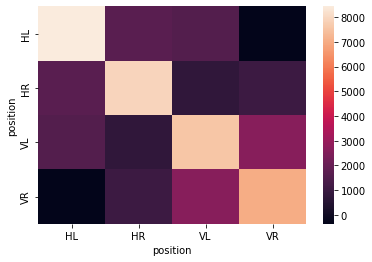

In [16]:
sns.heatmap(cov_matrix)

<AxesSubplot:xlabel='count'>

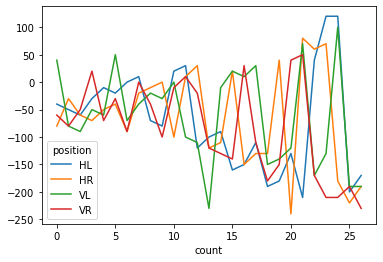

In [17]:
sample_matrix.plot(kind="line")

In [18]:
sample_matrix.describe()

position,HL,HR,VL,VR
count,27.000000,27.000000,27.000000,27.000000
mean,-67.777778,-63.333333,-61.481481,-82.962963
std,91.833182,88.881944,86.899752,83.703452
min,-210.000000,-240.000000,-230.000000,-230.000000
25%,-140.000000,-125.000000,-125.000000,-145.000000
50%,-70.000000,-60.000000,-60.000000,-80.000000
75%,-5.000000,5.000000,5.000000,-15.000000
max,120.000000,80.000000,100.000000,50.000000


### Data analyyis for body acceleration

In [31]:
df_body_acceleration = dfFA[dfFA.signal == "BodyAcceleration"]
df_body_acceleration

,physicalSignalValue,signal,position
28,2.300000e+16,BodyAcceleration,HL
29,-5.100000e+14,BodyAcceleration,HL
30,2.700000e+15,BodyAcceleration,HL
31,-3.300000e+15,BodyAcceleration,HL
32,1.900000e+16,BodyAcceleration,HL
...,...,...,...
1965,-2.090000e+02,BodyAcceleration,HR
1966,2.330000e+15,BodyAcceleration,HR
1967,2.290000e+16,BodyAcceleration,HR
1968,-3.270000e+16,BodyAcceleration,HR


### Checking on the distribution of values for the body acceleration

position
HL    AxesSubplot(0.125,0.125;0.775x0.755)
HR    AxesSubplot(0.125,0.125;0.775x0.755)
VL    AxesSubplot(0.125,0.125;0.775x0.755)
VR    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

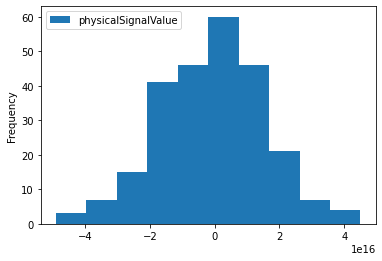

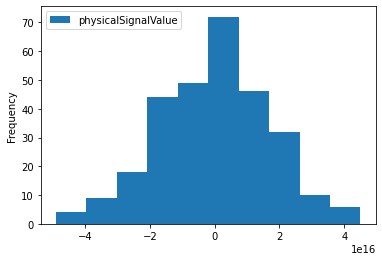

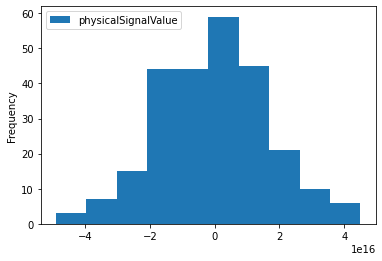

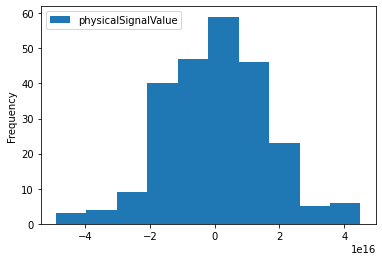

In [32]:
df_body_acceleration.groupby("position").plot(kind="hist")

In [34]:
df.signalId.unique()

array([132706, 132705, 106001, 132703, 132707, 132704, 132710, 132709,
       132708])

In [37]:
df_body_acceleration.groupby("position").count()

,physicalSignalValue,signal
position,,
HL,250,251
HR,290,290
VL,254,255
VR,242,243


In [40]:
# in order to calculate the covariance matrix, we assume that the signal values on the four positions are mesured at the same time.
df_body_acceleration = df_body_acceleration.assign(count = df_body_acceleration.groupby("position").cumcount())
sample_matrix = df_body_acceleration.pivot(index='count', columns='position', values='physicalSignalValue').iloc[:240].fillna(axis=0, method='bfill')

In [41]:
sample_matrix

position,HL,HR,VL,VR
count,,,,
0,2.300000e+16,-2.500000e+01,-2.700000e+15,-2.700000e+15
1,-5.100000e+14,-3.500000e+16,3.300000e+16,-7.000000e+15
2,2.700000e+15,2.100000e+16,2.300000e+16,-8.700000e+15
3,-3.300000e+15,7.000000e+15,-1.300000e+14,1.300000e+16
4,1.900000e+16,4.900000e+14,2.700000e+15,7.100000e+15
...,...,...,...,...
235,-1.830000e+16,-2.850000e+15,-3.490000e+16,-3.430000e+16
236,3.390000e+16,-2.230000e+16,3.050000e+16,2.470000e+16
237,-2.070000e+16,1.970000e+16,1.750000e+02,2.510000e+16


In [43]:
cov_matrix = sample_matrix.cov()
cov_matrix

position,HL,HR,VL,VR
position,,,,
HL,2.676115e+32,-1.287570e+31,2.284605e+31,1.654319e+31
HR,-1.287570e+31,2.604751e+32,-1.441294e+31,4.125477e+31
VL,2.284605e+31,-1.441294e+31,2.796367e+32,8.283682e+30
VR,1.654319e+31,4.125477e+31,8.283682e+30,2.614128e+32


<AxesSubplot:xlabel='position', ylabel='position'>

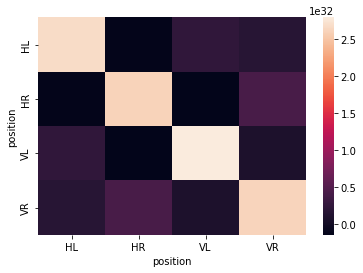

In [44]:
sns.heatmap(cov_matrix)

<AxesSubplot:xlabel='count'>

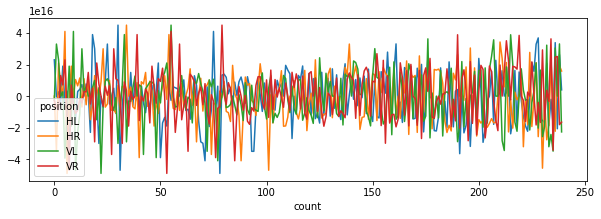

In [47]:
sample_matrix.plot(kind="line", figsize=(10,))
